## Taller 1

In [2]:
import os
import pandas as pd
from sklearn.metrics import mean_squared_error
from scipy import stats

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Medellin'
fuente = 'IDEAM'
fuente2 = 'NREL'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_pd = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')
serie_csv2 = os.path.join(base_dir,ciudad,fuente2+'.csv')
serie_pd2 = pd.read_csv(serie_csv2, sep = ';',
                       encoding='latin-1')

## 1. Cálculo de ENFICC 99%

In [5]:
def enfic(serie_horaria):
    
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    ghi_df1= pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    
    for agno in agnos:
        
        for mes in range(1,13):
            
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),
                                        nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],
                        "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
            
        for mes in range (1,13):
                
            ghi_diario = ghi_df.loc[((ghi_df["AÑO"] == agno) &
                                    (ghi_df["MES"] == mes)),"GHImes"].item()/dias[-1]
                
            ghi_dict1 = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
                
            ghi_df1= ghi_df1.append(ghi_dict1, ignore_index=True)
            
    percentil = 0.01
    enficc = ghi_df1.quantile(q=percentil, 
                                 numeric_only=True)["GHIdiario"]
    
    pr=print('La ENFICC 99% es: ', enficc)
    
    return pr

In [6]:
enfic=enfic(serie_pd)

La ENFICC 99% es:  3.38522333489


## 2.Gráfica distribución de energía

In [7]:
def GHIdia(serie_horaria):
    
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    ghi_df1= pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    
    for agno in agnos:
        
        for mes in range(1,13):
            
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),
                                        nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],
                        "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
            
        for mes in range (1,13):
                
            ghi_diario = ghi_df.loc[((ghi_df["AÑO"] == agno) &
                                    (ghi_df["MES"] == mes)),"GHImes"].item()/dias[-1]
                
            ghi_dict1 = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
                
            ghi_df1= ghi_df1.append(ghi_dict1, ignore_index=True)
            
    return ghi_df1

In [8]:
def GHImensual(serie_horaria):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),
                                        nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],
                        "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

In [9]:
def grafica (serie1,serie2):
    
    ghi_dias1=GHIdia(serie1)
    ghi_dias2=GHIdia(serie2)
    
    datos_IDEAM = sorted(ghi_dias1["GHIdiario"])
    datos_SATELITE = sorted(ghi_dias2["GHIdiario"])
    
    pylab.xlabel("Datos")
    pylab.ylabel("Energía/Energía Base IDEAM")
    numdatos1 = range(len(datos_IDEAM))
    numdatos2 = range(len(datos_SATELITE))
    pylab.plot(numdatos1,datos_IDEAM/datos_IDEAM[0],'-k', label='IDEAM')
    pylab.plot(numdatos2,datos_SATELITE/datos_IDEAM[0],'--', label='SATELITE')
    pylab.legend(loc='upper left')

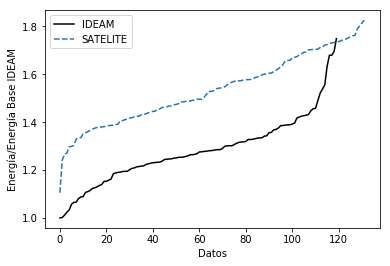

In [10]:
grafica(serie_pd,serie_pd2)

## 3.Metodología Medición-Correlación-Predicción (MCP) 

- Función para cortar la serie larga en periodos más cortos

In [11]:
def periodo (serie_larga,agno_inicio,agno_final,mes_inicio,mes_final):
    
    nuevo=pd.DataFrame(columns=["AÑO", "MES", "DIA","HORA" ,"GHI"])

    guardar=[]
    
    for agno in range(agno_inicio,agno_final):
    
        for mes in range(mes_inicio,mes_final):

            datos=serie_larga.loc[(serie_larga["AÑO"] == agno)& (serie_larga["MES"] == mes)]
            guardar.append(datos)
            ghi_df = pd.concat(guardar)
            

    return ghi_df

In [12]:
serie_pd21=periodo(serie_pd2,2006,2017,1,13)

- Función de ajuste

In [13]:
def fun (x,a,b):
        return a+(b*x)

- Función para reemplazar los números negativos de una serie por ceros

In [14]:
def negativos (serie):

    num = serie._get_numeric_data()
    num[num < 0] = 0
    
    return serie

- Función para la MCP

In [15]:
def MCP (obj,ref,año_inicial,año_final,mes):
    
    datos_corr= ref.copy()
    
    ref_p=periodo(ref,año_inicial,año_final,1,mes)
    
    MCP= pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHI_cor"])
    
    nombre_1=list(obj)[-1]
    nombre_2=list(ref)[-1]
 
    prom_obj=obj[nombre_1].mean()
    prom_ref=ref_p[nombre_2].mean()
    
    std_obj=obj[nombre_1].std()
    std_ref=ref_p[nombre_2].std()
    rel_std=std_obj/std_ref
    const= prom_obj-(rel_std*prom_ref)
    
    datos_ref=ref[nombre_2]
    c=fun(datos_ref,const,rel_std)
    
    datos_corr['NREL']=c
    
    datos_corregidos_sinnegativo=negativos(datos_corr)
    
    return datos_corr

In [16]:
serie_obj=periodo(serie_pd,2015,2016,1,13)

In [17]:
serie_cor=MCP(serie_obj,serie_pd2,2015,2016,13)

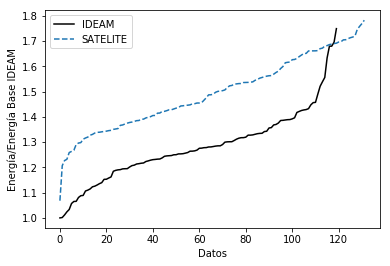

In [18]:
grafica(serie_pd,serie_cor)

In [19]:
IDEAM_mensual=GHImensual(serie_pd)
SATEL_mensual=GHImensual(serie_pd2)
SATELCOR_mensual=GHImensual(serie_cor)
I=IDEAM_mensual['GHImes']
S=SATEL_mensual['GHImes']
S_C=SATELCOR_mensual['GHImes']

In [20]:
numdatos_IDEAM = range(len(IDEAM_mensual))
numdatos_SATEL = range(len(SATEL_mensual))
numdatos_SATELCOR = range(len(SATELCOR_mensual))

Text(0,0.5,'W/$m^{2}$ / W/$m^{2}$')

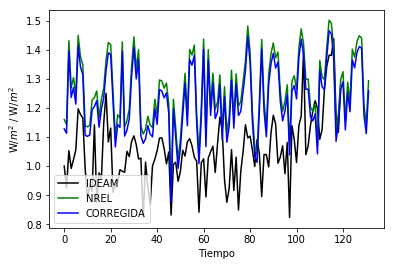

In [21]:
pylab.plot(numdatos_IDEAM,I/I[0],'-k', label='IDEAM')
pylab.plot(numdatos_SATEL,S/I[0],'-g', label='NREL')
pylab.plot(numdatos_SATELCOR,S_C/I[0],'-b', label='CORREGIDA')
pylab.legend(loc='lower left')
pylab.xlabel("Tiempo")
pylab.ylabel("W/$m^{2}$ / W/$m^{2}$")

## 4.Cálculo de los indicadores de error (RMSEn,MEB,KSI)

In [22]:
def RMSEn (serie_ideam,serie_corregida):
    
    nombre_1=list(serie_ideam)[-1]
    nombre_2=list(serie_corregida)[-1]
    
    fila_ideam=serie_ideam[nombre_1]
    fila_corregida=serie_corregida[nombre_2]
    
    difference=(fila_ideam-fila_corregida)**2
    mean_difference=difference.mean()
    
    minimo=min(fila_ideam)
    maximo=max(fila_ideam)
    rmse_val = np.sqrt(mean_difference)/(maximo-minimo)*100
    
    return rmse_val

In [23]:
def MEB (serie_ideam,serie_corregida):
    
    nombre_1=list(serie_ideam)[-1]
    nombre_2=list(serie_corregida)[-1]
    
    fila_ideam=serie_ideam[nombre_1]
    fila_corregida=serie_corregida[nombre_2]
    
    difference=(fila_corregida-fila_ideam)
    sum_difference=difference.sum()
    sum_ideam=fila_ideam.sum()
    
    meb_val=(sum_difference/sum_ideam)*100
    
    return meb_val

In [24]:
def KSI (serie_ideam,serie_corregida):
    
    nombre_1=list(serie_ideam)[-1]
    nombre_2=list(serie_corregida)[-1]
        
    fila_ideam=serie_ideam[nombre_1]
    fila_corregida=serie_corregida[nombre_2]
    
    ksi=stats.ks_2samp(fila_ideam,fila_corregida)
    pvalue=ksi[1]
    
    return pvalue

## Análisis de la eficacia del método MCP 

In [25]:
def calculo (serie,agno_inicial,agno_final,mes,nombre):
    
    datos=pd.DataFrame(columns=[nombre,"RMSE [%]","MEB [%]","KSI (p-value)"])
    error_meb=[]
    error_rmse=[]
    error_ksi=[]
    
    
    
    for agno1 in range (agno_inicial,agno_final):
        
            
            c=agno1+1
            mes=mes
            serie_mes=periodo(serie_pd,agno_inicial,c,1,mes)
            serie_cor_mes=MCP(serie_mes,serie,agno_inicial,agno_final,mes)
            negativos(serie_cor_mes)
            error_RMSE_mes=RMSEn(serie_pd,serie_cor_mes)
            error_MEB_mes=MEB(serie_pd,serie_cor_mes)
            error_KSI_mes=KSI(GHImensual(serie_pd),GHImensual(serie_cor_mes))

            error_rmse.append(error_RMSE_mes)
            error_meb.append(error_MEB_mes)
            error_ksi.append(error_KSI_mes)
            
   
        
    datos['RMSE [%]']=pd.Series(error_rmse)
    datos['MEB [%]']=pd.Series(error_meb)
    datos['KSI (p-value)']=pd.Series(error_ksi)

    
    return datos
    

### - Analisis del efecto de la longitud de las series

In [26]:
mes_1=calculo(serie_pd21,2006,2007,2,"MESES")
mes_3=calculo(serie_pd21,2006,2007,4,"MESES")
mes_6=calculo(serie_pd21,2006,2007,7,"MESES")
años=calculo(serie_pd21,2006,2016,13,"MESES")

In [27]:
frames=[mes_1,mes_3,mes_6,años]
tabla=pd.concat(frames)
meses=np.array([1,3,6,12,24,36,48,60,72,84,96,108,120])

In [28]:
tabla['MESES']=meses
index=range(0,13)
tabla.index=index

#### - Tabla de errores para series de diferente longitud

In [29]:
tabla

,MESES,RMSE [%],MEB [%],KSI (p-value)
0,1,12.078867,-0.583967,0.781593
1,3,12.001285,-2.301200,0.088885
2,6,12.147702,0.242893,0.366570
3,12,12.119495,-0.018186,0.459738
4,24,12.081550,-0.632996,0.781593
5,36,12.066625,-0.999053,0.563757
6,48,12.024582,-1.672657,0.459738
7,60,11.998193,-1.996095,0.165311
8,72,11.995365,-2.053274,0.165311
9,84,12.002102,-1.901676,0.219572


#### - Cálculo de errores para la serie satelital original

In [30]:
datos=pd.DataFrame(columns=["NREL","RMSE [%]","MEB [%]","KSI (p-value)"])
error_RMSE_mes=np.array([RMSEn(serie_pd,serie_pd21)])
error_MEB_mes=MEB(serie_pd,serie_pd21)
error_KSI_mes=KSI(GHImensual(serie_pd),GHImensual(serie_pd21))
datos['RMSE [%]']=error_RMSE_mes
datos['MEB [%]']=error_MEB_mes
datos['KSI (p-value)']=error_KSI_mes
datos

,NREL,RMSE [%],MEB [%],KSI (p-value)
0,NaN,13.782443,17.095651,2.133617e-24


#### - Gráfica del error RMSEn para series de diferente longitud

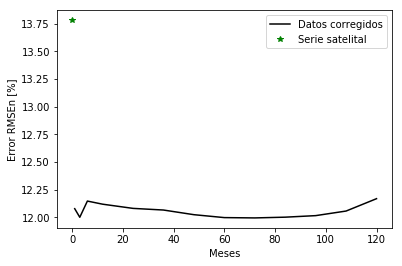

In [31]:
pylab.xlabel("Meses")
pylab.ylabel("Error RMSEn [%]")
pylab.plot(tabla['MESES'],tabla['RMSE [%]'],'-k',label="Datos corregidos")
pylab.plot(0,datos['RMSE [%]'],'*g',label="Serie satelital")
pylab.legend(loc='upper right')

#### - Gráfica del error MEB para series de diferente longitud

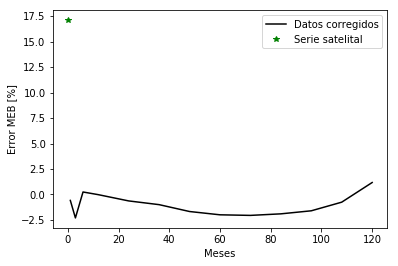

In [32]:
pylab.xlabel("Meses")
pylab.ylabel("Error MEB [%]")
pylab.plot(tabla['MESES'],tabla['MEB [%]'],'-k',label="Datos corregidos")
pylab.plot(0,datos['MEB [%]'],'*g',label="Serie satelital")
pylab.legend(loc='upper right')

#### - Gráfica del p-value para series de diferente longitud

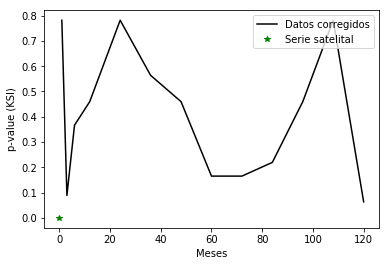

In [33]:
pylab.xlabel("Meses")
pylab.ylabel("p-value (KSI)")
pylab.plot(tabla['MESES'],tabla['KSI (p-value)'],'-k', label="Datos corregidos")
pylab.plot(0,datos['KSI (p-value)'],'*g',label="Serie satelital")
pylab.legend(loc='upper right')

### Análisis

De acuerdo a los resutados obtenidos en la modificación del largo de la serie utilizada para realizar el ajuste, podemos decir que cumplen con lo esperado. Por un lado, el error RMSEn disminuye a medida que la serie (IDEAM) utilizada para el ajuste es más larga, en el error MEB tiene un comportamiento similar. Por otro lado, el comportamiento del p-value es coherente con los obtenidos en los errores de sesgo debido a que es mayor en los puntos donde los errores de sesgo son menores, esto se debe a que un p-value más cercano a 1 significa que las series tienen distribuciones más similares.

Por otro lado, los errores obtenidos en las series corregidas en 



### - Analisis en el uso de diferentes años

In [34]:
año_1=calculo(serie_pd21,2006,2007,13,"AÑO")
año_2=calculo(serie_pd21,2007,2008,13,"AÑO")
año_3=calculo(serie_pd21,2008,2009,13,"AÑO")
año_4=calculo(serie_pd21,2009,2010,13,"AÑO")
año_5=calculo(serie_pd21,2010,2011,13,"AÑO")
año_6=calculo(serie_pd21,2011,2012,13,"AÑO")
año_7=calculo(serie_pd21,2012,2013,13,"AÑO")
año_8=calculo(serie_pd21,2013,2014,13,"AÑO")
año_9=calculo(serie_pd21,2014,2015,13,"AÑO")
año_10=calculo(serie_pd21,2015,2016,13,"AÑO")

In [35]:
frames=[año_1,año_2,año_3,año_4,año_5,año_6,año_7,año_8,año_9,año_10]
tabla_1=pd.concat(frames)
años=np.array([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015])

In [36]:
tabla_1['AÑO']=años
index_1=range(0,10)
tabla_1.index=index_1

#### - Tabla de errores para diferentes años

In [37]:
tabla_1

,AÑO,RMSE [%],MEB [%],KSI (p-value)
0,2006,12.145119,0.252048,3.665702e-01
1,2007,12.062328,-0.624204,7.815930e-01
2,2008,12.271928,2.758108,5.874848e-03
3,2009,12.001242,-0.910922,6.737812e-01
4,2010,11.947473,-1.886174,2.195716e-01
5,2011,11.975924,-2.189355,1.222792e-01
6,2012,11.961041,-3.199525,1.391738e-02
7,2013,12.074215,-1.115069,5.637568e-01
8,2014,12.280394,2.709932,5.874848e-03
9,2015,13.526994,14.243818,2.191121e-20


#### - Gráfica del error RMSEn para series de diferentes años

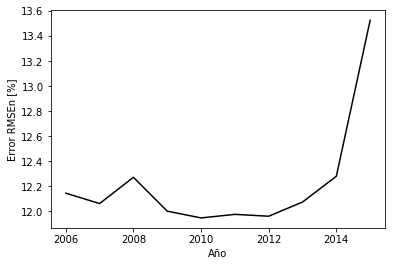

In [38]:
pylab.xlabel("Año")
pylab.ylabel("Error RMSEn [%]")
pylab.plot(tabla_1['AÑO'],tabla_1['RMSE [%]'],'-k')

#### - Gráfica del error MEB para series de diferentes años

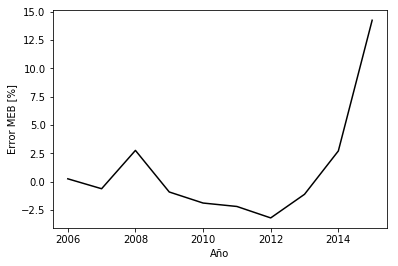

In [39]:
pylab.xlabel("Año")
pylab.ylabel("Error MEB [%]")
pylab.plot(tabla_1['AÑO'],tabla_1['MEB [%]'],'-k')

#### - Gráfica del p-value para series de diferentes años

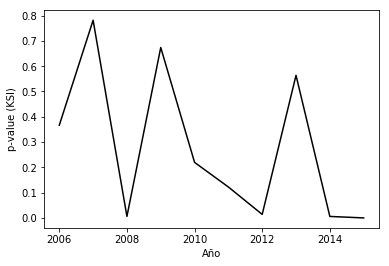

In [40]:
pylab.xlabel("Año")
pylab.ylabel("p-value (KSI)")
pylab.plot(tabla_1['AÑO'],tabla_1['KSI (p-value)'],'-k')